# Exploratory Data Analysis - Employee Dimension Data
This notebook performs EDA on the `dim_employees_anon.csv` file from the Data Edge Internal Data folder.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Set Data Directory Path
data_dir = r"c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data"
file_path = os.path.join(data_dir, "dim__notion_roles__anonymized.csv")

# Verify file exists
if os.path.exists(file_path):
    print(f"✓ File found: {file_path}")
    print(f"File size: {os.path.getsize(file_path)} bytes")
else:
    print(f"✗ File not found: {file_path}")

✓ File found: c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data\dim__notion_roles__anonymized.csv
File size: 11680 bytes


In [3]:
# Load Employee Data
try:
    df_roles = pd.read_csv(file_path)
    print("✓ Data loaded successfully!")
    print(f"Dataset shape: {df_roles.shape}")
except Exception as e:
    print(f"✗ Error loading data: {e}")

✓ Data loaded successfully!
Dataset shape: (101, 8)


## Dataset Overview

In [4]:
# Basic Information
print("=== BASIC INFORMATION ===")
print(f"Shape: {df_roles.shape}")
print(f"Columns: {list(df_roles.columns)}")
print(f"Data types:\n{df_roles.dtypes}")
print(f"\nMemory usage: {df_roles.memory_usage(deep=True).sum() / 1024:.2f} KB")

=== BASIC INFORMATION ===
Shape: (101, 8)
Columns: ['role_id', 'industry_name', 'role_category_name', 'hourly_rate', 'billing_type', 'seniority', 'startdate', 'name_anon']
Data types:
role_id                object
industry_name          object
role_category_name     object
hourly_rate           float64
billing_type           object
seniority              object
startdate              object
name_anon              object
dtype: object

Memory usage: 47.26 KB


In [5]:
# First Few Rows
print("=== FIRST 5 ROWS ===")
display(df_roles.head())

print("\n=== LAST 5 ROWS ===")
display(df_roles.tail())

=== FIRST 5 ROWS ===


,role_id,industry_name,role_category_name,hourly_rate,billing_type,seniority,startdate,name_anon
0,68fb318f-438b-4257-95f2-3893564ebd01,NaN,NaN,NaN,NaN,K2,2023-10-01,NaN
1,b5a1a16b-99d7-4895-b927-0d0afa074c35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,264b42da-30b3-8026-b4e1-f6a7c2832cc2,NaN,Data Analyst,900.0,Direct,NaN,2025-09-04,Terry and Sons
3,0517e8f8-b88c-41fa-ae1a-57458f4571d0,NaN,Data Engineer,1100.0,Invoicing(Right people Group),NaN,2022-12-05,Payne-Nelson
4,347c5d6b-8487-437c-8945-612a32c0b866,NaN,NaN,1100.0,NaN,NaN,2022-09-11,Payne-Nelson



=== LAST 5 ROWS ===


,role_id,industry_name,role_category_name,hourly_rate,billing_type,seniority,startdate,name_anon
96,c90ee650-07ac-4725-a75d-f0b4d5f6b5e6,Tech,Data Scientist,1000.0,Self-billing(Tingent),NaN,2022-09-01,"Richards, Acosta and Mccall"
97,a53e017d-e456-49bd-89b6-fdbeec1b30b4,Tech,Business Developer,1350.0,NaN,K4,2021-06-21,"Richards, Acosta and Mccall"
98,60b9abb5-6ff3-4bcd-be3c-ec6f396305c3,Tech,Business Developer,1000.0,Direct billing,NaN,2023-02-07,Price and Sons
99,38968285-7e0f-4c8b-b473-9cbacd5f0ab4,Tech,NaN,1700.0,Direct billing,K4,2023-02-07,Price and Sons
100,a80d6f1c-0863-48a9-a49c-fc8c7a24896b,Transportation and Logistics,Data Engineer,1200.0,Self bill,NaN,2023-07-04,"Morris, Juarez and Chavez"


In [7]:
df_roles.name_anon.value_counts()

name_anon
Ortega Group                       12
Sullivan PLC                       10
Jones-Willis                        7
Cooper LLC                          6
Gonzalez-Miller                     4
Campbell, Johnson and Smith         4
Gamble, Summers and Bailey          4
Joseph and Sons                     4
Barnes and Sons                     4
Hopkins, Wagner and Ho              3
Ramirez, Rodriguez and Gonzalez     3
Richards, Acosta and Mccall         3
Payne-Nelson                        2
Price and Sons                      2
Harvey, Collins and Walker          2
Anderson Ltd                        2
Hill, Wilson and Matthews           2
Hernandez, Walker and Holt          2
Ward and Sons                       2
Smith, Guerrero and Howell          2
Rogers, Perry and Ramsey            2
Eaton LLC                           2
Lee, Freeman and Jones              1
Terry and Sons                      1
Harris, Watson and Donaldson        1
Robinson, Kaufman and Mills         1
St

## Data Quality Assessment

In [6]:
# Missing Values Analysis
print("=== MISSING VALUES ===")
missing_data = df_roles.isnull().sum()
missing_percent = (missing_data / len(df_roles)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Duplicates
print(f"\n=== DUPLICATES ===")
print(f"Total duplicated rows: {df_roles.duplicated().sum()}")
print(f"Percentage of duplicates: {(df_roles.duplicated().sum() / len(df_roles)) * 100:.2f}%")

=== MISSING VALUES ===
                    Missing Count  Missing Percentage
seniority                      39           38.613861
billing_type                   34           33.663366
role_category_name             26           25.742574
hourly_rate                    15           14.851485
industry_name                  14           13.861386
startdate                       5            4.950495
name_anon                       2            1.980198

=== DUPLICATES ===
Total duplicated rows: 0
Percentage of duplicates: 0.00%


## Statistical Summary

=== SENIORITY & HOURLY RATE ANALYSIS ===
✓ Both columns found!

--- SENIORITY UNIQUE VALUES ---
Total unique values: 4
Missing values: 39

Value counts:


seniority
NaN    39
K3     27
K2     21
K4     11
K1      3
Name: count, dtype: int64


--- HOURLY RATE UNIQUE VALUES ---
Total unique values: 27
Missing values: 15
Data type: float64

Value counts (top 10):


hourly_rate
NaN       15
1100.0    15
1500.0     8
1000.0     6
1450.0     6
1200.0     6
1300.0     4
1050.0     4
1600.0     4
900.0      3
Name: count, dtype: int64


Hourly Rate Statistics:
  Min: 800.0
  Max: 2000.0
  Mean: 1282.01
  Median: 1220.00
  Std Dev: 271.26

--- CORRELATION ANALYSIS ---
Records for analysis (after removing NaN): 57
Seniority levels found: ['K2', 'K3', 'K4', 'K1']

Note: Seniority is categorical. For correlation, we'd need to encode it numerically.

--- HOURLY RATE BY SENIORITY ---


,count,mean,median,min,max,std
seniority,,,,,,
K1,2,1025.00,1025.0,1000.0,1050.0,35.36
K2,18,1166.00,1125.0,850.0,1600.0,201.67
K3,26,1347.88,1410.0,800.0,2000.0,285.18
K4,11,1558.18,1450.0,1240.0,2000.0,272.10



--- SCATTERPLOT ---


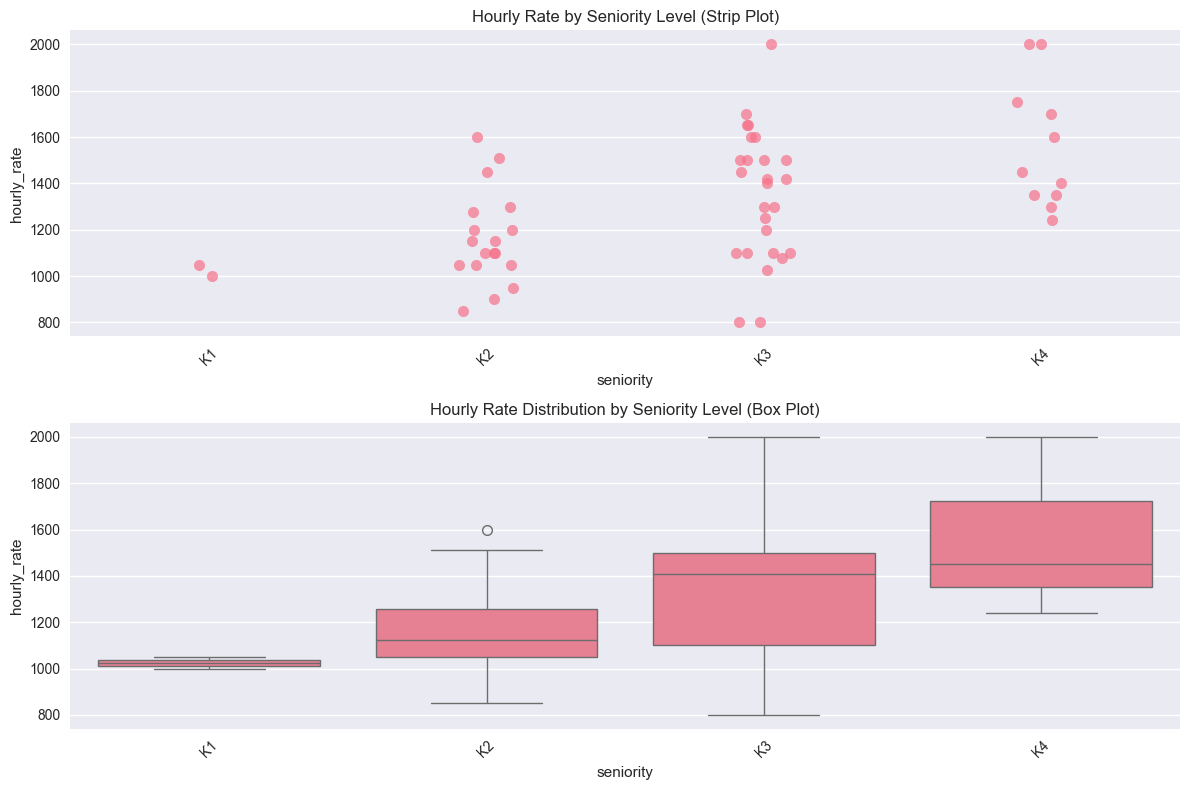

In [7]:
# Analysis of Seniority and Hourly Rate Columns
print("=== SENIORITY & HOURLY RATE ANALYSIS ===")

# Check if columns exist
required_cols = ['seniority', 'hourly_rate']
existing_cols = [col for col in required_cols if col in df_roles.columns]
missing_cols = [col for col in required_cols if col not in df_roles.columns]

if missing_cols:
    print(f"❌ Missing columns: {missing_cols}")
    print(f"Available columns: {list(df_roles.columns)}")
else:
    print("✓ Both columns found!")
    
    # Unique values and counts for seniority
    print("\n--- SENIORITY UNIQUE VALUES ---")
    seniority_counts = df_roles['seniority'].value_counts(dropna=False)
    print(f"Total unique values: {df_roles['seniority'].nunique()}")
    print(f"Missing values: {df_roles['seniority'].isna().sum()}")
    print("\nValue counts:")
    display(seniority_counts)
    
    # Unique values and counts for hourly_rate
    print("\n--- HOURLY RATE UNIQUE VALUES ---")
    hourly_rate_counts = df_roles['hourly_rate'].value_counts(dropna=False)
    print(f"Total unique values: {df_roles['hourly_rate'].nunique()}")
    print(f"Missing values: {df_roles['hourly_rate'].isna().sum()}")
    print(f"Data type: {df_roles['hourly_rate'].dtype}")
    print("\nValue counts (top 10):")
    display(hourly_rate_counts.head(10))
    
    # Basic statistics for hourly_rate
    if df_roles['hourly_rate'].dtype in ['int64', 'float64']:
        print(f"\nHourly Rate Statistics:")
        print(f"  Min: {df_roles['hourly_rate'].min()}")
        print(f"  Max: {df_roles['hourly_rate'].max()}")
        print(f"  Mean: {df_roles['hourly_rate'].mean():.2f}")
        print(f"  Median: {df_roles['hourly_rate'].median():.2f}")
        print(f"  Std Dev: {df_roles['hourly_rate'].std():.2f}")
    
    # Correlation Analysis
    print("\n--- CORRELATION ANALYSIS ---")
    
    # Create a clean dataset for analysis (remove missing values)
    clean_data = df_roles[['seniority', 'hourly_rate']].dropna()
    print(f"Records for analysis (after removing NaN): {len(clean_data)}")
    
    if len(clean_data) > 1:
        # For correlation, we might need to encode seniority if it's categorical
        if df_roles['seniority'].dtype == 'object':
            # Create a mapping for seniority levels (assuming they have a natural order)
            seniority_unique = df_roles['seniority'].dropna().unique()
            print(f"Seniority levels found: {list(seniority_unique)}")
            
            # You might want to create a custom mapping based on actual seniority levels
            # For now, let's use value_counts to see the levels
            print("\nNote: Seniority is categorical. For correlation, we'd need to encode it numerically.")
        
        # If hourly_rate is numeric, we can still do analysis
        if df_roles['hourly_rate'].dtype in ['int64', 'float64']:
            # Group statistics by seniority
            print("\n--- HOURLY RATE BY SENIORITY ---")
            seniority_stats = df_roles.groupby('seniority')['hourly_rate'].agg([
                'count', 'mean', 'median', 'min', 'max', 'std'
            ]).round(2)
            display(seniority_stats)
    
    # Create Scatterplot
    print("\n--- SCATTERPLOT ---")
    
    plt.figure(figsize=(12, 8))
    
    # If seniority is categorical, create a strip plot or box plot instead
    if df_roles['seniority'].dtype == 'object':

        seniority_order = ['K1', 'K2', 'K3', 'K4']
        plt.subplot(2, 1, 1)
        sns.stripplot(data=df_roles, x='seniority', y='hourly_rate', size=8, alpha=0.7, order=seniority_order)
        plt.title('Hourly Rate by Seniority Level (Strip Plot)')
        plt.xticks(rotation=45)
        
        plt.subplot(2, 1, 2)
        sns.boxplot(data=df_roles, x='seniority', y='hourly_rate', order=seniority_order)
        plt.title('Hourly Rate Distribution by Seniority Level (Box Plot)')
        plt.xticks(rotation=45)
        
    else:
        # If both are numeric, create a traditional scatterplot
        plt.scatter(df_roles['seniority'], df_roles['hourly_rate'], alpha=0.7)
        plt.xlabel('Seniority')
        plt.ylabel('Hourly Rate')
        plt.title('Scatterplot: Seniority vs Hourly Rate')
        
        # Calculate and display correlation
        correlation = df_roles[['seniority', 'hourly_rate']].corr().iloc[0, 1]
        plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=plt.gca().transAxes, fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Additional correlation if possible
    if df_roles['seniority'].dtype in ['int64', 'float64'] and df_roles['hourly_rate'].dtype in ['int64', 'float64']:
        correlation_matrix = df_roles[['seniority', 'hourly_rate']].corr()
        print(f"\nPearson Correlation Coefficient: {correlation_matrix.iloc[0,1]:.4f}")
        
        # Correlation heatmap
        plt.figure(figsize=(6, 4))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
        plt.title('Correlation Heatmap: Seniority vs Hourly Rate')
        plt.show()

In [8]:
df_roles.industry_name.value_counts()

industry_name
Financial Services                20
Manufacturing                     19
Tech                              17
Energy and Utilities               8
Retail and Consumer Goods          8
Construction and Real Estate       7
Public sector                      4
Healthcare and Pharmaceuticals     2
Automotive                         1
Transportation and Logistics       1
Name: count, dtype: int64

=== AVERAGE HOURLY RATE BY INDUSTRY ANALYSIS ===
✓ Both columns found!
Records for analysis (after removing NaN): 78 out of 101

--- HOURLY RATE STATISTICS BY INDUSTRY ---


,count,mean,median,min,max,std
industry_name,,,,,,
Healthcare and Pharmaceuticals,2,1500.00,1500.0,1500.0,1500.0,0.00
Construction and Real Estate,5,1460.00,1500.0,1400.0,1500.0,54.77
Financial Services,20,1378.50,1420.0,1050.0,2000.0,254.58
Retail and Consumer Goods,8,1375.00,1400.0,1100.0,1700.0,271.24
Tech,16,1306.25,1100.0,1000.0,2000.0,356.78
Manufacturing,13,1274.46,1200.0,900.0,1600.0,215.54
Transportation and Logistics,1,1200.00,1200.0,1200.0,1200.0,NaN
Energy and Utilities,8,1162.50,1175.0,950.0,1300.0,130.25
Automotive,1,1000.00,1000.0,1000.0,1000.0,NaN


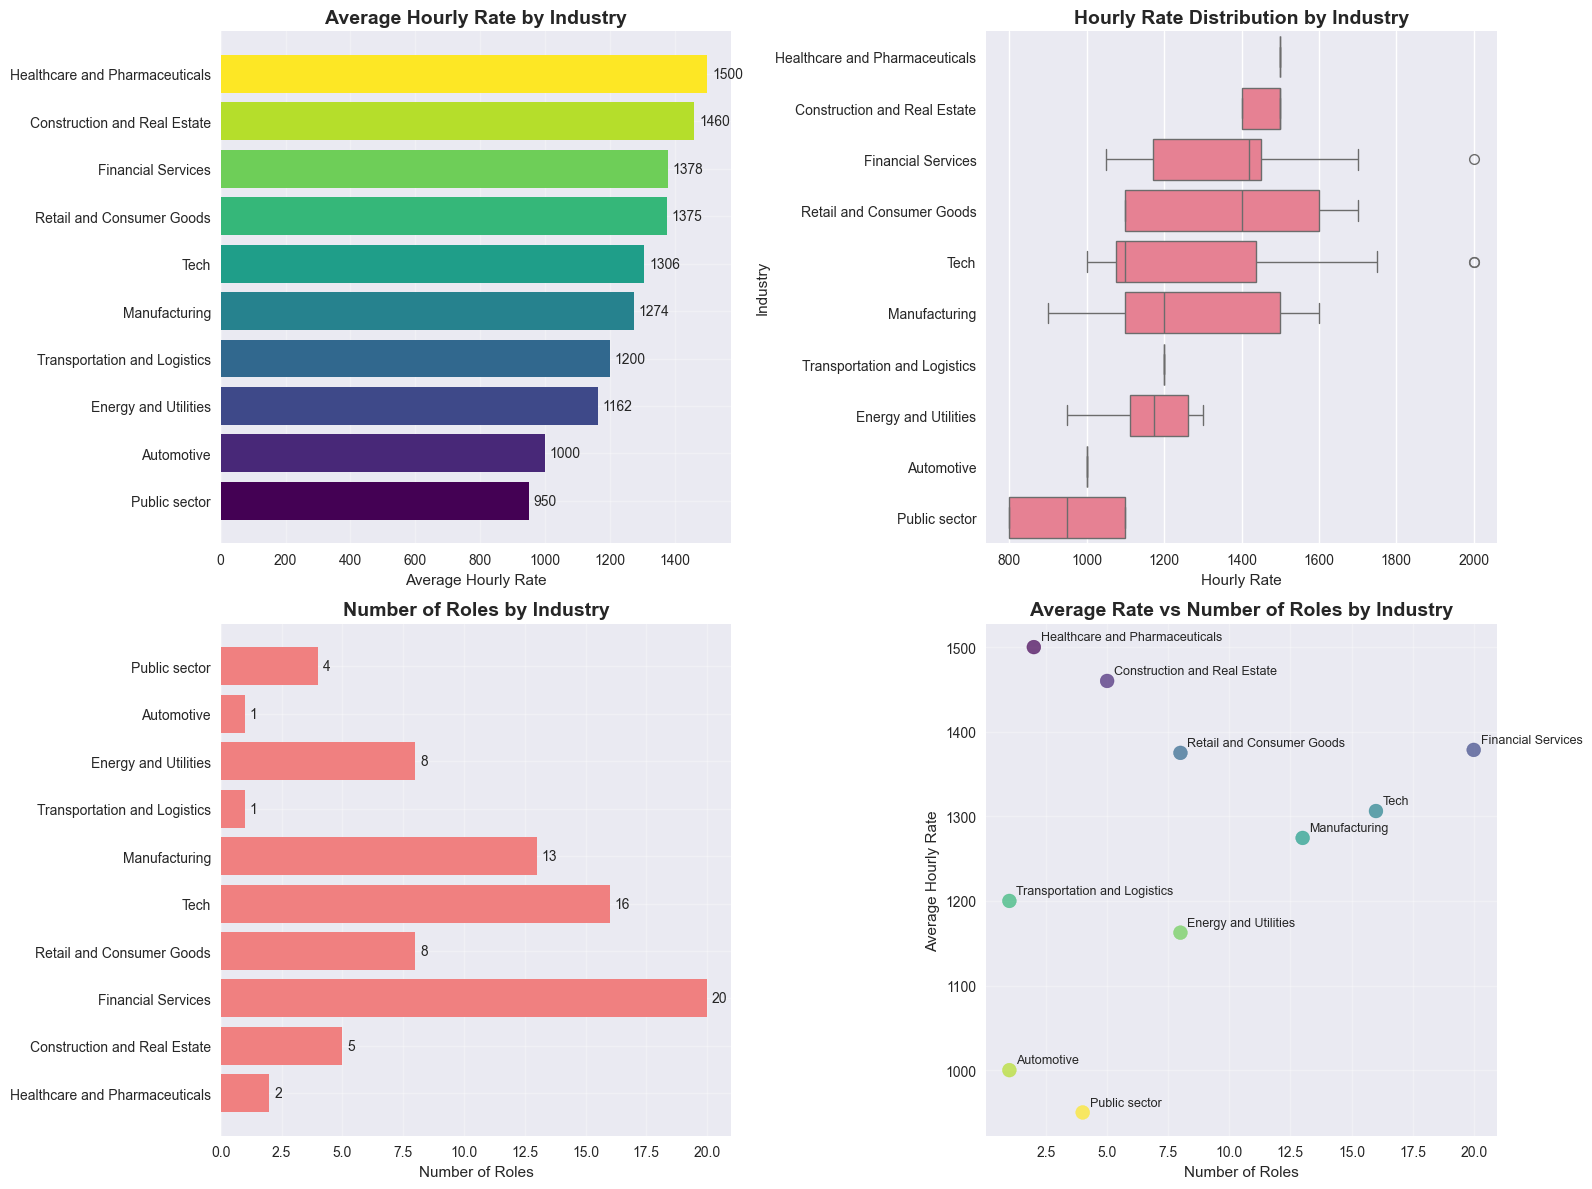


=== KEY INSIGHTS ===
🏆 Highest average rate: Healthcare and Pharmaceuticals ($1500/hour)
📉 Lowest average rate: Public sector ($950/hour)
📊 Most roles offered: Financial Services (20 roles)
💰 Rate spread across industries: $550/hour

--- OVERALL STATISTICS ---
Total industries: 10
Average rate across all industries: $1261/hour
Standard deviation of average rates: $184


In [12]:
# Analysis of Average Hourly Rate by Industry Name
print("=== AVERAGE HOURLY RATE BY INDUSTRY ANALYSIS ===")

# Check if required columns exist
if 'industry_name' in df_roles.columns and 'hourly_rate' in df_roles.columns:
    print("✓ Both columns found!")
    
    # Clean data - remove rows with missing values
    clean_data = df_roles[['industry_name', 'hourly_rate']].dropna()
    print(f"Records for analysis (after removing NaN): {len(clean_data)} out of {len(df_roles)}")
    
    if len(clean_data) > 0:
        # Calculate average hourly rate by industry
        industry_avg_rates = clean_data.groupby('industry_name')['hourly_rate'].agg([
            'count', 'mean', 'median', 'min', 'max', 'std'
        ]).round(2)
        
        # Sort by average rate (descending)
        industry_avg_rates = industry_avg_rates.sort_values('mean', ascending=False)
        
        print("\n--- HOURLY RATE STATISTICS BY INDUSTRY ---")
        display(industry_avg_rates)
        
        # Create visualizations
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Bar plot of average hourly rates
        avg_rates = industry_avg_rates['mean'].sort_values(ascending=True)
        colors = plt.cm.viridis(np.linspace(0, 1, len(avg_rates)))
        
        bars = ax1.barh(avg_rates.index, avg_rates.values, color=colors)
        ax1.set_title('Average Hourly Rate by Industry', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Average Hourly Rate')
        ax1.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax1.text(width + max(avg_rates.values) * 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{width:.0f}', ha='left', va='center', fontsize=10)
        
        # 2. Box plot showing distribution by industry
        industry_order = industry_avg_rates.index.tolist()
        sns.boxplot(data=clean_data, y='industry_name', x='hourly_rate', 
                   order=industry_order, ax=ax2)
        ax2.set_title('Hourly Rate Distribution by Industry', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Hourly Rate')
        ax2.set_ylabel('Industry')
        
        # 3. Count of roles per industry
        role_counts = clean_data['industry_name'].value_counts()
        role_counts = role_counts.reindex(industry_order)
        
        bars2 = ax3.barh(role_counts.index, role_counts.values, color='lightcoral')
        ax3.set_title('Number of Roles by Industry', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Number of Roles')
        ax3.grid(True, alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars2):
            width = bar.get_width()
            ax3.text(width + max(role_counts.values) * 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{int(width)}', ha='left', va='center', fontsize=10)
        
        # 4. Scatter plot: Average Rate vs Number of Roles
        scatter_data = pd.DataFrame({
            'industry': industry_avg_rates.index,
            'avg_rate': industry_avg_rates['mean'],
            'role_count': industry_avg_rates['count']
        })
        
        scatter = ax4.scatter(scatter_data['role_count'], scatter_data['avg_rate'], 
                            s=100, alpha=0.7, c=range(len(scatter_data)), cmap='viridis')
        
        # Add labels for each point
        for i, row in scatter_data.iterrows():
            ax4.annotate(row['industry'], (row['role_count'], row['avg_rate']), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        ax4.set_title('Average Rate vs Number of Roles by Industry', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Number of Roles')
        ax4.set_ylabel('Average Hourly Rate')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Summary insights
        print("\n=== KEY INSIGHTS ===")
        highest_rate_industry = industry_avg_rates['mean'].idxmax()
        lowest_rate_industry = industry_avg_rates['mean'].idxmin()
        most_roles_industry = industry_avg_rates['count'].idxmax()
        
        print(f"🏆 Highest average rate: {highest_rate_industry} (${industry_avg_rates.loc[highest_rate_industry, 'mean']:.0f}/hour)")
        print(f"📉 Lowest average rate: {lowest_rate_industry} (${industry_avg_rates.loc[lowest_rate_industry, 'mean']:.0f}/hour)")
        print(f"📊 Most roles offered: {most_roles_industry} ({industry_avg_rates.loc[most_roles_industry, 'count']} roles)")
        
        # Rate range analysis
        rate_spread = industry_avg_rates['mean'].max() - industry_avg_rates['mean'].min()
        print(f"💰 Rate spread across industries: ${rate_spread:.0f}/hour")
        
        # Overall statistics
        print(f"\n--- OVERALL STATISTICS ---")
        print(f"Total industries: {len(industry_avg_rates)}")
        print(f"Average rate across all industries: ${industry_avg_rates['mean'].mean():.0f}/hour")
        print(f"Standard deviation of average rates: ${industry_avg_rates['mean'].std():.0f}")
        
    else:
        print("❌ No valid data found after cleaning")
        
else:
    missing_cols = []
    if 'industry_name' not in df_roles.columns:
        missing_cols.append('industry_name')
    if 'hourly_rate' not in df_roles.columns:
        missing_cols.append('hourly_rate')
    
    print(f"❌ Missing required columns: {missing_cols}")
    print(f"Available columns: {list(df_roles.columns)}")

=== ROLE CREATION TIMELINE ANALYSIS ===
✓ startdate column found!
✓ Successfully converted startdate to datetime
Timeline dataset shape: (96, 9)
Date range: 2020-10-01 to 2025-09-04

--- ROLES BY 4-MONTH PERIODS ---


,period_label,period_desc,role_count,cumulative_roles
0,2020-P3,2020 Q3 (Sep-Dec),1,1
1,2021-P2,2021 Q2 (May-Aug),3,4
2,2021-P3,2021 Q3 (Sep-Dec),6,10
3,2022-P1,2022 Q1 (Jan-Apr),7,17
4,2022-P2,2022 Q2 (May-Aug),6,23
5,2022-P3,2022 Q3 (Sep-Dec),11,34
6,2023-P1,2023 Q1 (Jan-Apr),11,45
7,2023-P2,2023 Q2 (May-Aug),6,51
8,2023-P3,2023 Q3 (Sep-Dec),11,62
9,2024-P1,2024 Q1 (Jan-Apr),8,70


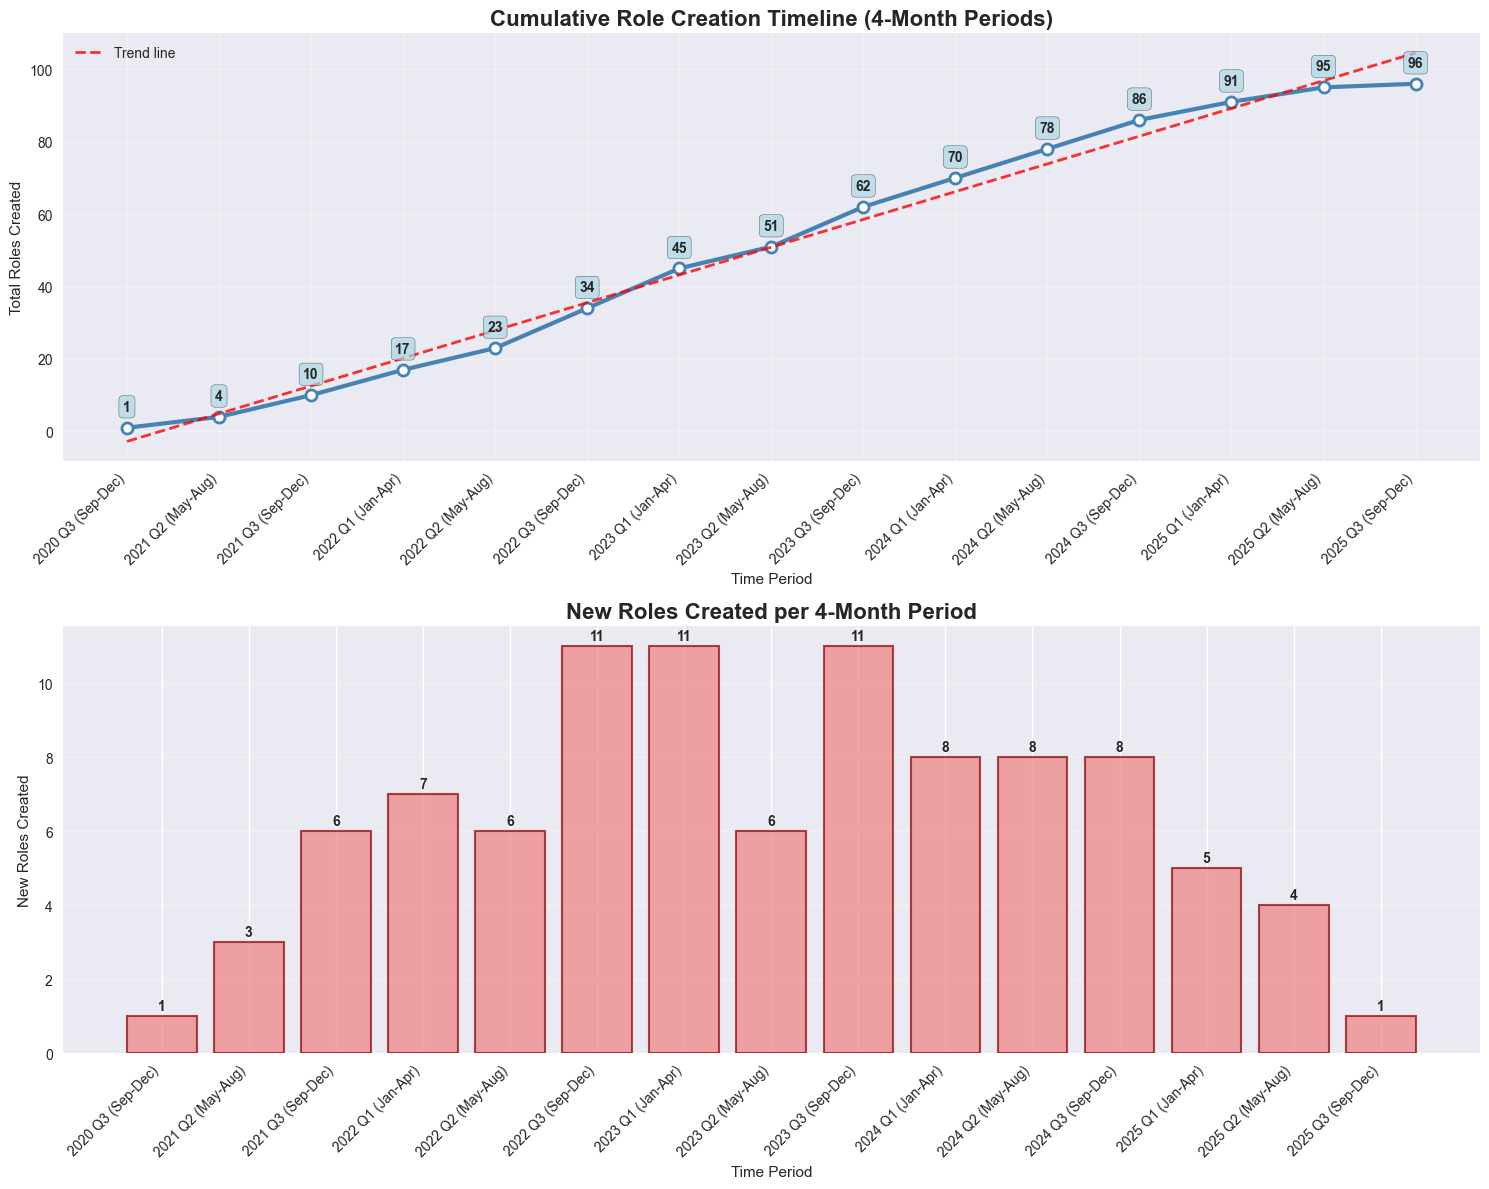


=== TIMELINE SUMMARY STATISTICS ===
First role created: 2020-10-01
Most recent role: 2025-09-04
Total roles: 96
Number of 4-month periods: 15
Average roles per period: 6.4
Most active period: 2022 Q3 (Sep-Dec) (11 roles)
Least active period: 2020 Q3 (Sep-Dec) (1 roles)
Growth rate (first vs last period): +0.0%

--- PERIOD-OVER-PERIOD GROWTH RATES ---
2021 Q2 (May-Aug): +200.0%
2021 Q3 (Sep-Dec): +100.0%
2022 Q1 (Jan-Apr): +16.7%
2022 Q2 (May-Aug): -14.3%
2022 Q3 (Sep-Dec): +83.3%
2023 Q1 (Jan-Apr): +0.0%
2023 Q2 (May-Aug): -45.5%
2023 Q3 (Sep-Dec): +83.3%
2024 Q1 (Jan-Apr): -27.3%
2024 Q2 (May-Aug): +0.0%
2024 Q3 (Sep-Dec): +0.0%
2025 Q1 (Jan-Apr): -37.5%
2025 Q2 (May-Aug): -20.0%
2025 Q3 (Sep-Dec): -75.0%


In [13]:
# Timeline Analysis - Role Creation Over Time
print("=== ROLE CREATION TIMELINE ANALYSIS ===")

# Check if startdate column exists
if 'startdate' in df_roles.columns:
    print("✓ startdate column found!")
    
    # Convert startdate to datetime
    try:
        df_roles['startdate_clean'] = pd.to_datetime(df_roles['startdate'], errors='coerce')
        print("✓ Successfully converted startdate to datetime")
    except Exception as e:
        print(f"✗ Error converting startdate: {e}")
    
    # Remove rows with invalid or missing start dates
    df_timeline = df_roles.dropna(subset=['startdate_clean']).copy()
    df_timeline = df_timeline.sort_values('startdate_clean')
    
    if len(df_timeline) > 0:
        print(f"Timeline dataset shape: {df_timeline.shape}")
        print(f"Date range: {df_timeline['startdate_clean'].min().strftime('%Y-%m-%d')} to {df_timeline['startdate_clean'].max().strftime('%Y-%m-%d')}")
        
        # Create 4-month periods
        # We'll use quarter-like periods but with 4-month intervals
        df_timeline['year'] = df_timeline['startdate_clean'].dt.year
        df_timeline['month'] = df_timeline['startdate_clean'].dt.month
        
        # Create 4-month period labels (Jan-Apr, May-Aug, Sep-Dec)
        def get_4month_period(month):
            if month <= 4:
                return 1  # Jan-Apr
            elif month <= 8:
                return 2  # May-Aug
            else:
                return 3  # Sep-Dec
        
        df_timeline['period_num'] = df_timeline['month'].apply(get_4month_period)
        df_timeline['period_label'] = df_timeline['year'].astype(str) + '-P' + df_timeline['period_num'].astype(str)
        
        # Create more descriptive period labels
        period_names = {1: 'Q1 (Jan-Apr)', 2: 'Q2 (May-Aug)', 3: 'Q3 (Sep-Dec)'}
        df_timeline['period_desc'] = df_timeline['year'].astype(str) + ' ' + df_timeline['period_num'].map(period_names)
        
        # Count roles by period
        roles_by_period = df_timeline.groupby(['period_label', 'period_desc']).size().reset_index(name='role_count')
        roles_by_period = roles_by_period.sort_values('period_label')
        
        # Calculate cumulative sum
        roles_by_period['cumulative_roles'] = roles_by_period['role_count'].cumsum()
        
        print(f"\n--- ROLES BY 4-MONTH PERIODS ---")
        display(roles_by_period)
        
        # Create visualization
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
        
        # 1. Cumulative roles timeline (line chart)
        ax1.plot(range(len(roles_by_period)), roles_by_period['cumulative_roles'], 
                marker='o', linewidth=3, markersize=8, color='steelblue', markerfacecolor='white', 
                markeredgecolor='steelblue', markeredgewidth=2)
        
        # Add data labels
        for i, (idx, row) in enumerate(roles_by_period.iterrows()):
            ax1.annotate(f'{int(row["cumulative_roles"])}', 
                        xy=(i, row['cumulative_roles']),
                        xytext=(0, 10), textcoords='offset points',
                        ha='center', va='bottom', fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
        
        ax1.set_title('Cumulative Role Creation Timeline (4-Month Periods)', fontsize=16, fontweight='bold')
        ax1.set_xlabel('Time Period')
        ax1.set_ylabel('Total Roles Created')
        ax1.grid(True, alpha=0.3)
        ax1.set_xticks(range(len(roles_by_period)))
        ax1.set_xticklabels(roles_by_period['period_desc'], rotation=45, ha='right')
        
        # Add trend line
        if len(roles_by_period) > 1:
            z = np.polyfit(range(len(roles_by_period)), roles_by_period['cumulative_roles'], 1)
            p = np.poly1d(z)
            ax1.plot(range(len(roles_by_period)), p(range(len(roles_by_period))), 
                    "--", alpha=0.8, color='red', linewidth=2, label=f'Trend line')
            ax1.legend()
        
        # 2. New roles per period (bar chart)
        bars = ax2.bar(range(len(roles_by_period)), roles_by_period['role_count'], 
                      color='lightcoral', alpha=0.7, edgecolor='darkred', linewidth=1.5)
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
        
        ax2.set_title('New Roles Created per 4-Month Period', fontsize=16, fontweight='bold')
        ax2.set_xlabel('Time Period')
        ax2.set_ylabel('New Roles Created')
        ax2.grid(True, alpha=0.3, axis='y')
        ax2.set_xticks(range(len(roles_by_period)))
        ax2.set_xticklabels(roles_by_period['period_desc'], rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Summary statistics
        print("\n=== TIMELINE SUMMARY STATISTICS ===")
        print(f"First role created: {df_timeline['startdate_clean'].min().strftime('%Y-%m-%d')}")
        print(f"Most recent role: {df_timeline['startdate_clean'].max().strftime('%Y-%m-%d')}")
        print(f"Total roles: {len(df_timeline)}")
        print(f"Number of 4-month periods: {len(roles_by_period)}")
        
        # Growth analysis
        if len(roles_by_period) > 1:
            avg_roles_per_period = roles_by_period['role_count'].mean()
            max_roles_period = roles_by_period.loc[roles_by_period['role_count'].idxmax()]
            min_roles_period = roles_by_period.loc[roles_by_period['role_count'].idxmin()]
            
            print(f"Average roles per period: {avg_roles_per_period:.1f}")
            print(f"Most active period: {max_roles_period['period_desc']} ({int(max_roles_period['role_count'])} roles)")
            print(f"Least active period: {min_roles_period['period_desc']} ({int(min_roles_period['role_count'])} roles)")
            
            # Calculate growth rate between first and last period
            if len(roles_by_period) >= 2:
                first_period_roles = roles_by_period.iloc[0]['role_count']
                last_period_roles = roles_by_period.iloc[-1]['role_count']
                if first_period_roles > 0:
                    growth_rate = ((last_period_roles - first_period_roles) / first_period_roles) * 100
                    print(f"Growth rate (first vs last period): {growth_rate:+.1f}%")
        
        # Period-over-period growth rates
        if len(roles_by_period) > 1:
            roles_by_period['period_growth'] = roles_by_period['role_count'].pct_change() * 100
            print(f"\n--- PERIOD-OVER-PERIOD GROWTH RATES ---")
            for _, row in roles_by_period.iterrows():
                if pd.notna(row['period_growth']):
                    print(f"{row['period_desc']}: {row['period_growth']:+.1f}%")
    
    else:
        print("❌ No valid roles with start dates found")

else:
    print(f"❌ 'startdate' column not found")
    print(f"Available columns: {list(df_roles.columns)}")

In [14]:
#These graphs provide decent insights. I need to decide the best period to add roles. I also think that a linegraph would
#be better than a bar graph for the second one.

=== HOURLY RATE DISTRIBUTION BY INDUSTRY AND ROLE CATEGORY ===
✓ All required columns found!
Records for analysis (after removing NaN): 64 out of 101

--- DATA EXPLORATION ---
Unique industries: 10
Unique role categories: 6
Industry list: ['Automotive', 'Construction and Real Estate', 'Energy and Utilities', 'Financial Services', 'Healthcare and Pharmaceuticals', 'Manufacturing', 'Public sector', 'Retail and Consumer Goods', 'Tech', 'Transportation and Logistics']
Role category list: ['Analytics Engineer', 'Business Developer', 'Data Analyst', 'Data Architect', 'Data Engineer', 'Data Scientist']

--- HOURLY RATE STATISTICS BY INDUSTRY AND ROLE CATEGORY ---


,industry_name,role_category_name,count,mean,median,min,max,std
0,Automotive,Data Engineer,1,1000.00,1000.0,1000.0,1000.0,NaN
2,Construction and Real Estate,Data Engineer,1,1500.00,1500.0,1500.0,1500.0,NaN
3,Construction and Real Estate,Data Scientist,1,1500.00,1500.0,1500.0,1500.0,NaN
1,Construction and Real Estate,Analytics Engineer,2,1400.00,1400.0,1400.0,1400.0,0.00
5,Energy and Utilities,Business Developer,2,1300.00,1300.0,1300.0,1300.0,0.00
4,Energy and Utilities,Analytics Engineer,1,1200.00,1200.0,1200.0,1200.0,NaN
6,Energy and Utilities,Data Engineer,2,1075.00,1075.0,1000.0,1150.0,106.07
11,Financial Services,Data Engineer,1,1650.00,1650.0,1650.0,1650.0,NaN
8,Financial Services,Business Developer,7,1457.14,1450.0,1300.0,1700.0,120.51
10,Financial Services,Data Architect,4,1342.50,1420.0,1080.0,1450.0,175.57


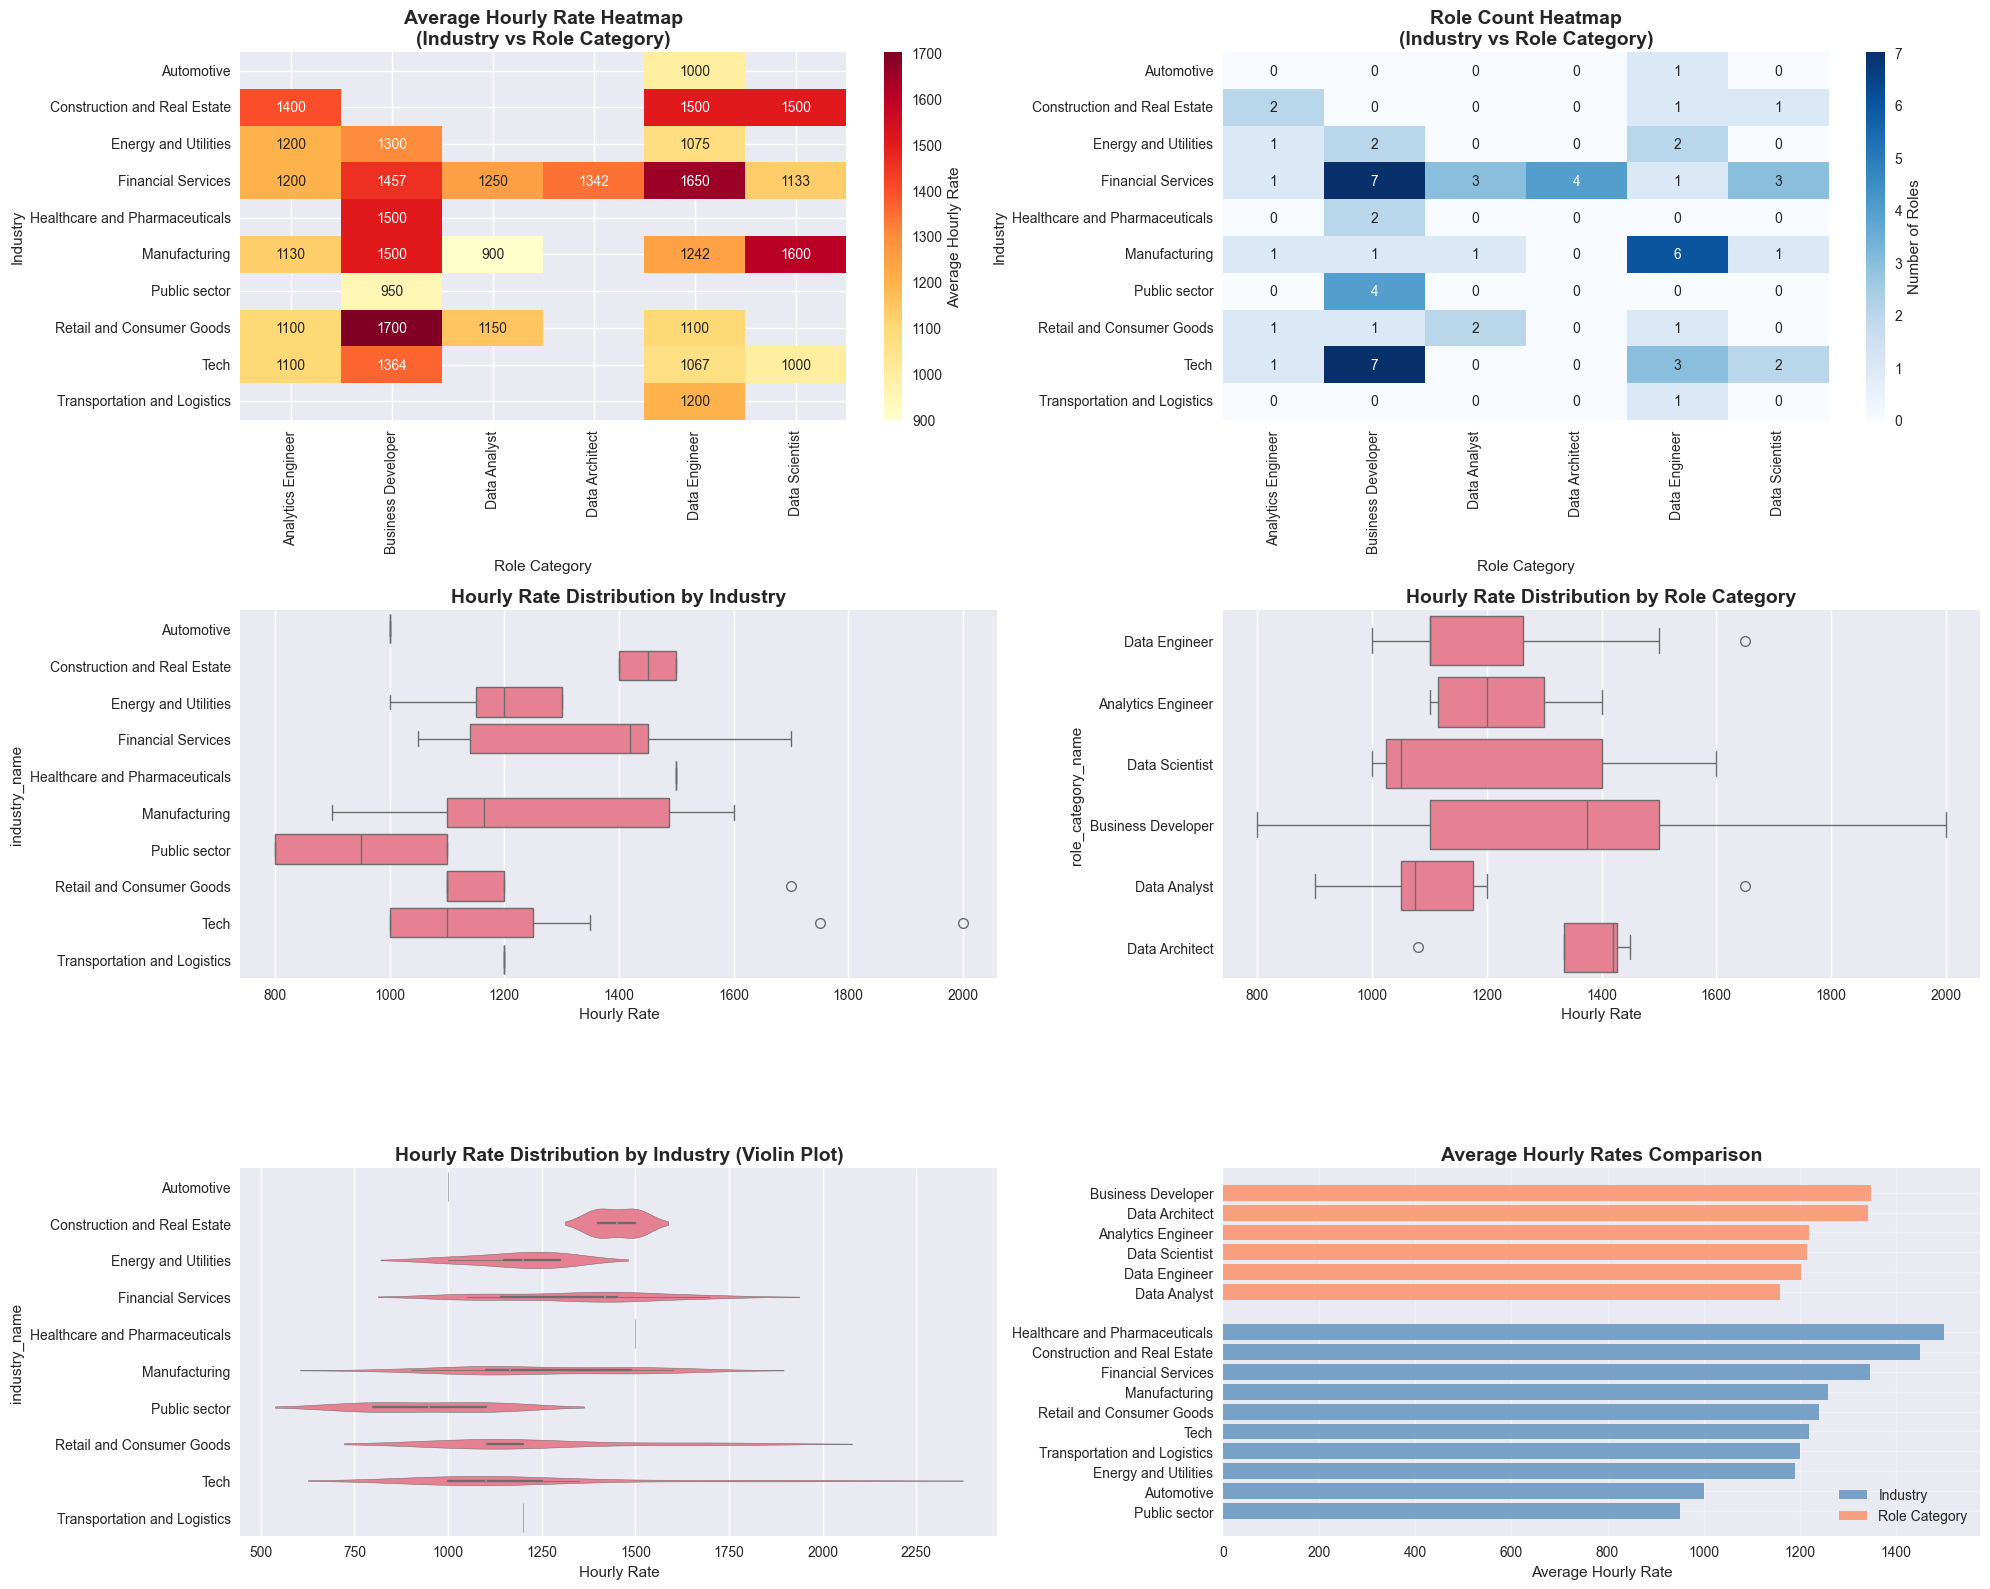


=== DETAILED ANALYSIS ===

🏆 TOP 10 HIGHEST PAYING COMBINATIONS (Industry + Role Category):
  Retail and Consumer Goods - Business Developer: $1700/hr (n=1)
  Financial Services - Data Engineer: $1650/hr (n=1)
  Manufacturing - Data Scientist: $1600/hr (n=1)
  Construction and Real Estate - Data Engineer: $1500/hr (n=1)
  Construction and Real Estate - Data Scientist: $1500/hr (n=1)
  Healthcare and Pharmaceuticals - Business Developer: $1500/hr (n=2)
  Manufacturing - Business Developer: $1500/hr (n=1)
  Financial Services - Business Developer: $1457/hr (n=7)
  Construction and Real Estate - Analytics Engineer: $1400/hr (n=2)
  Tech - Business Developer: $1364/hr (n=7)

📉 TOP 10 LOWEST PAYING COMBINATIONS:
  Manufacturing - Data Analyst: $900/hr (n=1)
  Public sector - Business Developer: $950/hr (n=4)
  Automotive - Data Engineer: $1000/hr (n=1)
  Tech - Data Scientist: $1000/hr (n=2)
  Tech - Data Engineer: $1067/hr (n=3)
  Energy and Utilities - Data Engineer: $1075/hr (n=2)
  Ret

,Total_Roles,Avg_Rate,Rate_StdDev,Min_Rate,Max_Rate,Unique_Categories
industry_name,,,,,,
Healthcare and Pharmaceuticals,2,1500.00,0.00,1500.0,1500.0,1
Construction and Real Estate,4,1450.00,57.74,1400.0,1500.0,3
Financial Services,19,1345.79,214.07,1050.0,1700.0,6
Manufacturing,10,1258.00,234.23,900.0,1600.0,5
Retail and Consumer Goods,5,1240.00,260.77,1100.0,1700.0,4
Tech,13,1219.23,312.61,1000.0,2000.0,4
Transportation and Logistics,1,1200.00,NaN,1200.0,1200.0,1
Energy and Utilities,5,1190.00,124.50,1000.0,1300.0,3
Automotive,1,1000.00,NaN,1000.0,1000.0,1



=== ROLE CATEGORY INSIGHTS ===
Role Category Summary (sorted by average rate):


,Total_Roles,Avg_Rate,Rate_StdDev,Min_Rate,Max_Rate,Unique_Industries
role_category_name,,,,,,
Business Developer,24,1347.92,289.86,800.0,2000.0,7
Data Architect,4,1342.50,175.57,1080.0,1450.0,1
Analytics Engineer,7,1218.57,130.69,1100.0,1400.0,6
Data Scientist,7,1214.29,252.84,1000.0,1600.0,4
Data Engineer,16,1203.12,204.51,1000.0,1650.0,8
Data Analyst,6,1158.33,259.65,900.0,1650.0,3



=== CROSS-TABULATION ===
Number of roles by Industry vs Role Category:


role_category_name,Analytics Engineer,Business Developer,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total
industry_name,,,,,,,
Automotive,0,0,0,0,1,0,1
Construction and Real Estate,2,0,0,0,1,1,4
Energy and Utilities,1,2,0,0,2,0,5
Financial Services,1,7,3,4,1,3,19
Healthcare and Pharmaceuticals,0,2,0,0,0,0,2
Manufacturing,1,1,1,0,6,1,10
Public sector,0,4,0,0,0,0,4
Retail and Consumer Goods,1,1,2,0,1,0,5
Tech,1,7,0,0,3,2,13


In [15]:
# Distribution of Hourly Rate by Industry Name and Role Category Name
print("=== HOURLY RATE DISTRIBUTION BY INDUSTRY AND ROLE CATEGORY ===")

# Check if required columns exist
required_cols = ['industry_name', 'role_category_name', 'hourly_rate']
existing_cols = [col for col in required_cols if col in df_roles.columns]
missing_cols = [col for col in required_cols if col not in df_roles.columns]

if missing_cols:
    print(f"❌ Missing columns: {missing_cols}")
    print(f"Available columns: {list(df_roles.columns)}")
else:
    print("✓ All required columns found!")
    
    # Clean data - remove rows with missing values
    clean_data = df_roles[['industry_name', 'role_category_name', 'hourly_rate']].dropna()
    print(f"Records for analysis (after removing NaN): {len(clean_data)} out of {len(df_roles)}")
    
    if len(clean_data) > 0:
        # First, let's explore the unique values
        print(f"\n--- DATA EXPLORATION ---")
        print(f"Unique industries: {clean_data['industry_name'].nunique()}")
        print(f"Unique role categories: {clean_data['role_category_name'].nunique()}")
        print(f"Industry list: {sorted(clean_data['industry_name'].unique())}")
        print(f"Role category list: {sorted(clean_data['role_category_name'].unique())}")
        
        # Calculate statistics by both dimensions
        dual_stats = clean_data.groupby(['industry_name', 'role_category_name'])['hourly_rate'].agg([
            'count', 'mean', 'median', 'min', 'max', 'std'
        ]).round(2)
        
        # Reset index to make it easier to work with
        dual_stats_df = dual_stats.reset_index()
        dual_stats_df = dual_stats_df.sort_values(['industry_name', 'mean'], ascending=[True, False])
        
        print(f"\n--- HOURLY RATE STATISTICS BY INDUSTRY AND ROLE CATEGORY ---")
        display(dual_stats_df)
        
        # Create comprehensive visualizations
        fig = plt.figure(figsize=(20, 16))
        
        # 1. Heatmap of average hourly rates
        ax1 = plt.subplot(3, 2, 1)
        pivot_mean = clean_data.pivot_table(values='hourly_rate', 
                                          index='industry_name', 
                                          columns='role_category_name', 
                                          aggfunc='mean')
        
        sns.heatmap(pivot_mean, annot=True, fmt='.0f', cmap='YlOrRd', 
                   cbar_kws={'label': 'Average Hourly Rate'}, ax=ax1)
        ax1.set_title('Average Hourly Rate Heatmap\n(Industry vs Role Category)', 
                     fontsize=14, fontweight='bold')
        ax1.set_xlabel('Role Category')
        ax1.set_ylabel('Industry')
        
        # 2. Count heatmap (number of roles)
        ax2 = plt.subplot(3, 2, 2)
        pivot_count = clean_data.pivot_table(values='hourly_rate', 
                                           index='industry_name', 
                                           columns='role_category_name', 
                                           aggfunc='count', 
                                           fill_value=0)
        
        sns.heatmap(pivot_count, annot=True, fmt='d', cmap='Blues', 
                   cbar_kws={'label': 'Number of Roles'}, ax=ax2)
        ax2.set_title('Role Count Heatmap\n(Industry vs Role Category)', 
                     fontsize=14, fontweight='bold')
        ax2.set_xlabel('Role Category')
        ax2.set_ylabel('Industry')
        
        # 3. Box plot by industry
        ax3 = plt.subplot(3, 2, 3)
        sns.boxplot(data=clean_data, y='industry_name', x='hourly_rate', ax=ax3)
        ax3.set_title('Hourly Rate Distribution by Industry', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Hourly Rate')
        
        # 4. Box plot by role category
        ax4 = plt.subplot(3, 2, 4)
        sns.boxplot(data=clean_data, y='role_category_name', x='hourly_rate', ax=ax4)
        ax4.set_title('Hourly Rate Distribution by Role Category', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Hourly Rate')
        
        # 5. Violin plot showing distribution by industry
        ax5 = plt.subplot(3, 2, 5)
        sns.violinplot(data=clean_data, y='industry_name', x='hourly_rate', ax=ax5)
        ax5.set_title('Hourly Rate Distribution by Industry (Violin Plot)', fontsize=14, fontweight='bold')
        ax5.set_xlabel('Hourly Rate')
        
        # 6. Average rates comparison
        ax6 = plt.subplot(3, 2, 6)
        
        # Calculate averages for both dimensions
        industry_avg = clean_data.groupby('industry_name')['hourly_rate'].mean().sort_values(ascending=True)
        category_avg = clean_data.groupby('role_category_name')['hourly_rate'].mean().sort_values(ascending=True)
        
        # Create side-by-side comparison
        x_pos_ind = np.arange(len(industry_avg))
        x_pos_cat = np.arange(len(category_avg)) + len(industry_avg) + 1
        
        bars1 = ax6.barh(x_pos_ind, industry_avg.values, alpha=0.7, color='steelblue', label='Industry')
        bars2 = ax6.barh(x_pos_cat, category_avg.values, alpha=0.7, color='coral', label='Role Category')
        
        # Set labels
        ax6.set_yticks(list(x_pos_ind) + list(x_pos_cat))
        ax6.set_yticklabels(list(industry_avg.index) + list(category_avg.index))
        ax6.set_xlabel('Average Hourly Rate')
        ax6.set_title('Average Hourly Rates Comparison', fontsize=14, fontweight='bold')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Detailed analysis and insights
        print("\n=== DETAILED ANALYSIS ===")
        
        # Top combinations by average rate
        top_combinations = dual_stats_df.nlargest(10, 'mean')
        print("\n🏆 TOP 10 HIGHEST PAYING COMBINATIONS (Industry + Role Category):")
        for _, row in top_combinations.iterrows():
            print(f"  {row['industry_name']} - {row['role_category_name']}: "
                  f"${row['mean']:.0f}/hr (n={int(row['count'])})")
        
        # Lowest combinations
        bottom_combinations = dual_stats_df.nsmallest(10, 'mean')
        print("\n📉 TOP 10 LOWEST PAYING COMBINATIONS:")
        for _, row in bottom_combinations.iterrows():
            print(f"  {row['industry_name']} - {row['role_category_name']}: "
                  f"${row['mean']:.0f}/hr (n={int(row['count'])})")
        
        # Most common combinations
        most_common = dual_stats_df.nlargest(10, 'count')
        print("\n📊 TOP 10 MOST COMMON COMBINATIONS:")
        for _, row in most_common.iterrows():
            print(f"  {row['industry_name']} - {row['role_category_name']}: "
                  f"{int(row['count'])} roles (avg: ${row['mean']:.0f}/hr)")
        
        # Industry-level insights
        print("\n=== INDUSTRY-LEVEL INSIGHTS ===")
        industry_summary = clean_data.groupby('industry_name').agg({
            'hourly_rate': ['count', 'mean', 'std', 'min', 'max'],
            'role_category_name': 'nunique'
        }).round(2)
        
        industry_summary.columns = ['Total_Roles', 'Avg_Rate', 'Rate_StdDev', 'Min_Rate', 'Max_Rate', 'Unique_Categories']
        industry_summary = industry_summary.sort_values('Avg_Rate', ascending=False)
        
        print("Industry Summary (sorted by average rate):")
        display(industry_summary)
        
        # Role category insights
        print("\n=== ROLE CATEGORY INSIGHTS ===")
        category_summary = clean_data.groupby('role_category_name').agg({
            'hourly_rate': ['count', 'mean', 'std', 'min', 'max'],
            'industry_name': 'nunique'
        }).round(2)
        
        category_summary.columns = ['Total_Roles', 'Avg_Rate', 'Rate_StdDev', 'Min_Rate', 'Max_Rate', 'Unique_Industries']
        category_summary = category_summary.sort_values('Avg_Rate', ascending=False)
        
        print("Role Category Summary (sorted by average rate):")
        display(category_summary)
        
        # Cross-tabulation for better understanding
        print("\n=== CROSS-TABULATION ===")
        crosstab = pd.crosstab(clean_data['industry_name'], 
                              clean_data['role_category_name'], 
                              margins=True, margins_name="Total")
        print("Number of roles by Industry vs Role Category:")
        display(crosstab)
        
    else:
        print("❌ No valid data found after cleaning")